# Importing and Querying Data with PostgreSQL (Northwind Database)

Describtion of the Northwind Database: https://en.wikiversity.org/wiki/Database_Examples/Northwind 

Example SQL-Queries based on the Northwind Database: https://www.w3schools.com/sql/default.asp

SQL Tutorials: https://www.youtube.com/watch?v=zpnHsWOy0RY&list=PLP9IO4UYNF0UQkBXlTMSw0CYsxv-GDkkI

## Frequently used SQL clauses (for in-depth learning)

<div>
  <style>
    .sql-keyword {
      color: white;
    }
  </style>
  <span class="sql-keyword">SELECT</span><br>
  <span class="sql-keyword">SELECT DISTINCT</span><br>
  <span class="sql-keyword">FROM</span><br>
  <span class="sql-keyword">WHERE</span><br>
  <span class="sql-keyword">AND</span><br>
  <span class="sql-keyword">LIKE</span><br>
  <span class="sql-keyword">GROUP BY</span><br>
  <span class="sql-keyword">HAVING</span><br>
  <span class="sql-keyword">ORDER BY</span><br>
  <span class="sql-keyword">FULL JOIN</span><br>
  <span class="sql-keyword">INNER JOIN</span><br>
  <span class="sql-keyword">LEFT JOIN</span><br>
  <span class="sql-keyword">RIGHT JOIN</span><br>
  <span class="sql-keyword">ON</span><br>
  <span class="sql-keyword">LIMIT</span><br>
  <span class="sql-keyword">AS</span><br>
  <span class="sql-keyword">AVG</span><br>
  <span class="sql-keyword">COUNT</span><br>
  <span class="sql-keyword">MIN</span><br>
  <span class="sql-keyword">MAX</span><br>
  <span class="sql-keyword">SUM</span><br>
  <span class="sql-keyword">BETWEEN</span><br>
  <span class="sql-keyword">IN</span><br>
  <span class="sql-keyword">IS NULL</span><br>
  <span class="sql-keyword">IS NOT NULL</span><br> 
  <span class="sql-keyword">ROUND</span><br> 
  <span class="sql-keyword">CAST</span><br>
  <span class="sql-keyword">NUMERIC</span><br>
  <span class="sql-keyword">INTEGER</span>  
</div>

## Libraries and Settings

In [63]:
# Libraries
import os
import pandas as pd
from sqlalchemy import create_engine, text
import matplotlib.pyplot as plt

# Settings
import warnings
warnings.filterwarnings("ignore")

# Dark background style for all graphics 
plt.style.use('dark_background')

# Current working directory
print(os.getcwd())

/workspaces/python_postgresql_pgadmin


## Read data from .csv files to separate data frames 

In [64]:
# Define path to data

# Read data from .csv files

# Change column names to lowercase

# Check dimensions of DataFrames

## Create database connection

In [65]:
# Set up database connection
user = "pgadmin"
password = "geheim"
host = "127.0.0.1"
port = "5432"
database = "northwind"

# Create Connection URL
db_connection_url = "postgresql://" + user + ":" + password +\
                    "@" + host + ":" + port + "/" + database

# Create SQLAlchemy Engine
engine = create_engine(db_connection_url)

# Test database connection
with engine.connect() as connection:
    result = connection.execute(text('SELECT current_database()'))
    print(result.fetchone())

# Dispose the engine
engine.dispose()

('northwind',)


## Write data frames to database tables

In [66]:
# Create SQLAlchemy Engine


# Drop tables if it exist


# Write DataFrames to database


# Dispose the engine


In [67]:
from sqlalchemy import text

# 1) Drop in richtiger Reihenfolge (wegen FK)
drop_sql = """
DROP TABLE IF EXISTS orderdetails CASCADE;
DROP TABLE IF EXISTS orders       CASCADE;
DROP TABLE IF EXISTS products     CASCADE;
DROP TABLE IF EXISTS customers    CASCADE;
DROP TABLE IF EXISTS suppliers    CASCADE;
DROP TABLE IF EXISTS categories   CASCADE;
DROP TABLE IF EXISTS shippers     CASCADE;
DROP TABLE IF EXISTS employees    CASCADE;
"""
with engine.begin() as conn:
    for stmt in drop_sql.strip().split(";"):
        s = stmt.strip()
        if s:
            conn.exec_driver_sql(s)

print("Bestehende Northwind-Tabellen gedroppt.")

# 2) Jetzt dein CREATE-Skript erneut ausführen
from pathlib import Path
sql_text = Path("SQL/CREATE_TABLES_NORTHWIND_DB.sql").read_text(encoding="utf-8")

with engine.begin() as conn:
    for stmt in sql_text.split(";"):
        s = stmt.strip()
        if s:
            conn.exec_driver_sql(s)

print("Northwind-Tabellen frisch erstellt.")

Bestehende Northwind-Tabellen gedroppt.
Northwind-Tabellen frisch erstellt.


## List tables in the database

In [68]:
# Create SQLAlchemy Engine
engine = create_engine(db_connection_url)

# Open a connection
with engine.connect() as connection:

    # Execute the query
    result = connection.execute(text("""SELECT table_name
                                        FROM information_schema.tables
                                        WHERE table_schema = 'public'"""))
    
    # Fetch and print the results
    for row in result:
        print(row[0])

# Dispose the engine
engine.dispose()

categories
products
suppliers
employees
orders
customers
shippers
orderdetails


In [69]:
import pandas as pd

## Create a SQL query to retrieve product information from a database.

Kontrollieren der welche Columns die Tabelle Products hat. Dient zur Recherche der versch. Columns/Spalten.

In [79]:
df_columns = pd.read_sql_query("""
    SELECT column_name, data_type
    FROM information_schema.columns
    WHERE table_name = 'products'
""", con=engine)

df_columns

,column_name,data_type
0,productid,integer
1,supplierid,integer
2,categoryid,integer
3,price,numeric
4,productname,character varying
5,unit,character varying


Kreiieren einer Tabelle mit ausgewählten Faktoren.

In [ ]:
# Create SQLAlchemy Engine
engine = create_engine(db_connection_url)

# Write data to table
df_sub = pd.read_sql_query("""
SELECT
    p.productid,
    p.productname,
    p.price,
    c.categoryname
FROM products p
JOIN categories c ON p.categoryid = c.categoryid
""",con=engine)

# Dispose the engine
engine.dispose()

# Show the data
df_sub


,productid,productname,price,categoryname
0,1,Chais,18.00,Beverages
1,2,Chang,19.00,Beverages
2,3,Aniseed Syrup,10.00,Condiments
3,4,Chef Anton's Cajun Seasoning,22.00,Condiments
4,5,Chef Anton's Gumbo Mix,21.35,Condiments
...,...,...,...,...
72,73,Röd Kaviar,15.00,Seafood
73,74,Longlife Tofu,10.00,Produce
74,75,Rhönbräu Klosterbier,7.75,Beverages
75,76,Lakkalikööri,18.00,Beverages


## Plot product prices

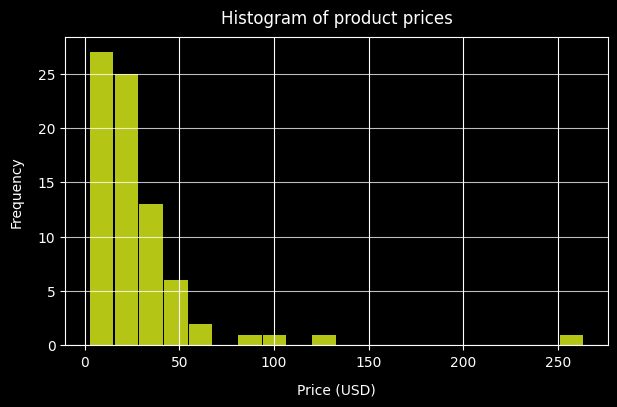

In [77]:
# Plot Histogram
import matplotlib.pyplot as plt
fig = plt.figure( figsize=(7,4))
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
n, bins, patches = plt.hist(x=df_sub['price'], 
                            bins=20, 
                            color="#B4C515",
                            alpha=1.00, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# Set labels
plt.xlabel('Price (USD)', fontsize=10, labelpad=10)
plt.ylabel('Frequency', fontsize=10, labelpad=10)
plt.title('Histogram of product prices', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [76]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.8.0-1030-azure
Datetime: 2025-09-19 17:00:51
Python Version: 3.12.1
-----------------------------------



# 1. What are the details of all customers whose country is 'Spain'?

In [ ]:
#Zuerst Custmers Tabelle abfragen / checken.
df_columns = pd.read_sql_query("""
    SELECT column_name, data_type
    FROM information_schema.columns
    WHERE table_name = 'customers'
""", con=engine)

df_columns


,column_name,data_type
0,customerid,integer
1,customername,character varying
2,contactname,character varying
3,address,character varying
4,city,character varying
5,postalcode,character varying
6,country,character varying


In [90]:
#Abfragen der Daten aus der Customers Tabelle
# Create SQLAlchemy Engine
engine = create_engine(db_connection_url)

# Write data to table
df_sub = pd.read_sql_query("""
SELECT
    p.customerid,
    p.customername,
    p.contactname,
    p.address,
    p.city,
    p.postalcode,
    p.country
FROM customers p
WHERE p.country = 'Spain' 
""",con=engine)

# Dispose the engine
engine.dispose()

# Show the data
df_sub


,customerid,customername,contactname,address,city,postalcode,country
0,8,Bólido Comidas preparadas,Martín Sommer,"C/ Araquil, 67",Madrid,28023,Spain
1,22,FISSA Fabrica Inter. Salchichas S.A.,Diego Roel,"C/ Moralzarzal, 86",Madrid,28034,Spain
2,29,Galería del gastrónomo,Eduardo Saavedra,"Rambla de Cataluña, 23",Barcelona,8022,Spain
3,30,Godos Cocina Típica,José Pedro Freyre,"C/ Romero, 33",Sevilla,41101,Spain
4,69,Romero y tomillo,Alejandra Camino,"Gran Vía, 1",Madrid,28001,Spain


# 2. What are the distinct cities of customers from Germany with a city containing the letter 'B'?


In [95]:
#Abfragen der Daten aus der Customers Tabelle
# Create SQLAlchemy Engine
engine = create_engine(db_connection_url)

# Write data to table
df_sub = pd.read_sql_query("""
SELECT
    p.customerid,
    p.customername,
    p.contactname,
    p.address,
    p.city,
    p.postalcode,
    p.country
FROM customers p
WHERE p.country = 'Germany' 
AND p.city LIKE '%%B%%'
""",con=engine)

# Dispose the engine
engine.dispose()

# Show the data
df_sub


,customerid,customername,contactname,address,city,postalcode,country
0,1,Alfreds Futterkiste,Maria Anders,Obere Str. 57,Berlin,12209,Germany
1,39,Königlich Essen,Philip Cramer,Maubelstr. 90,Brandenburg,14776,Germany
